In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
# v4 disables the 25% chance of the emulator ignoring the input action and 
# repeating the last action instead.
env = gym.make('Pong-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(6)

# Agent

In [6]:
from keras.optimizers import Adam

In [7]:
agent = DeepQAgent(env, 
    agent_history_length=4, 
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-5)
)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Pong-v4>>>,
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x7f82ab45fa58>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    loss=<function huber_loss at 0x7f82b8b7c7b8>,
    image_size=(84, 84),
)

In [8]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [01:24<00:00,  2.81s/game]


array([-21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -21., -21., -21., -21., -21., -21., -21., -21., -21.,
       -21., -21., -20., -21., -21., -21., -21., -21.])

In [9]:
res_random.mean()

-20.966666666666665

In [10]:
agent.observe(50000)

100%|██████████| 50000/50000 [01:03<00:00, 788.33frame/s]


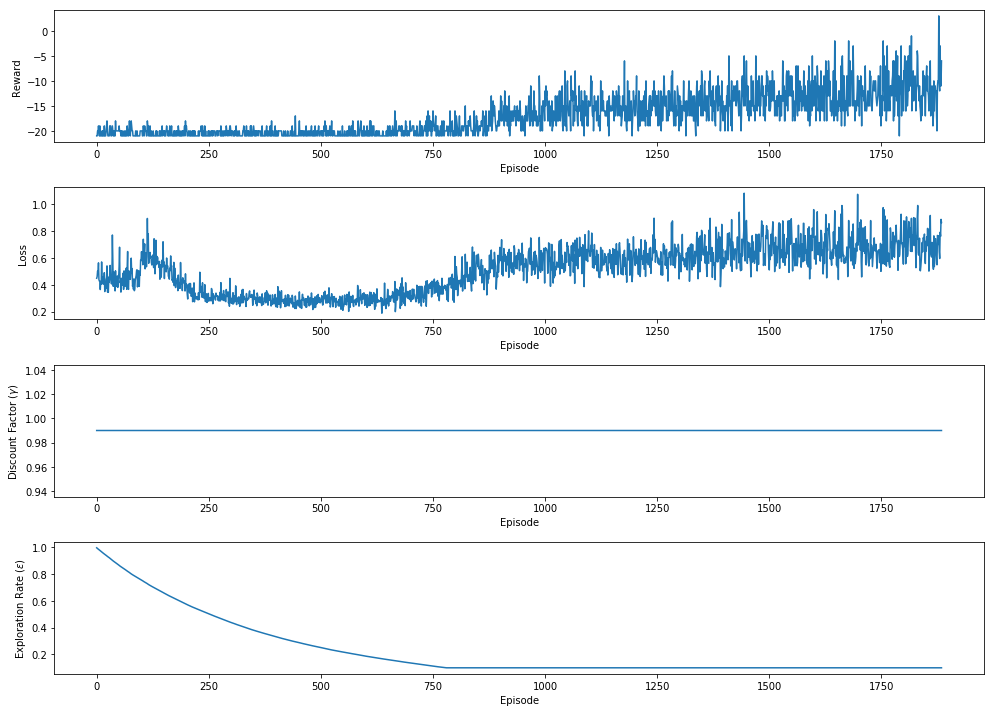

100%|█████████▉| 4995925/5000000 [13:52:24<00:44, 91.92frame/s]


In [11]:
agent.train(frames_to_play=5000000, callback=JupyterCallback())

In [12]:
res_trained = agent.play(games=30)
res_trained

100%|██████████| 30/30 [06:57<00:00, 13.92s/game]


array([ -8., -14., -19.,  -6., -17., -17., -12.,  -9., -12.,  -6., -13.,
       -11., -10., -11.,  -6., -16., -19., -11.,  -6., -13., -17., -10.,
        -9.,  -8., -17., -15., -11.,  -3., -16., -10.])

In [13]:
res_trained.mean()

-11.733333333333333

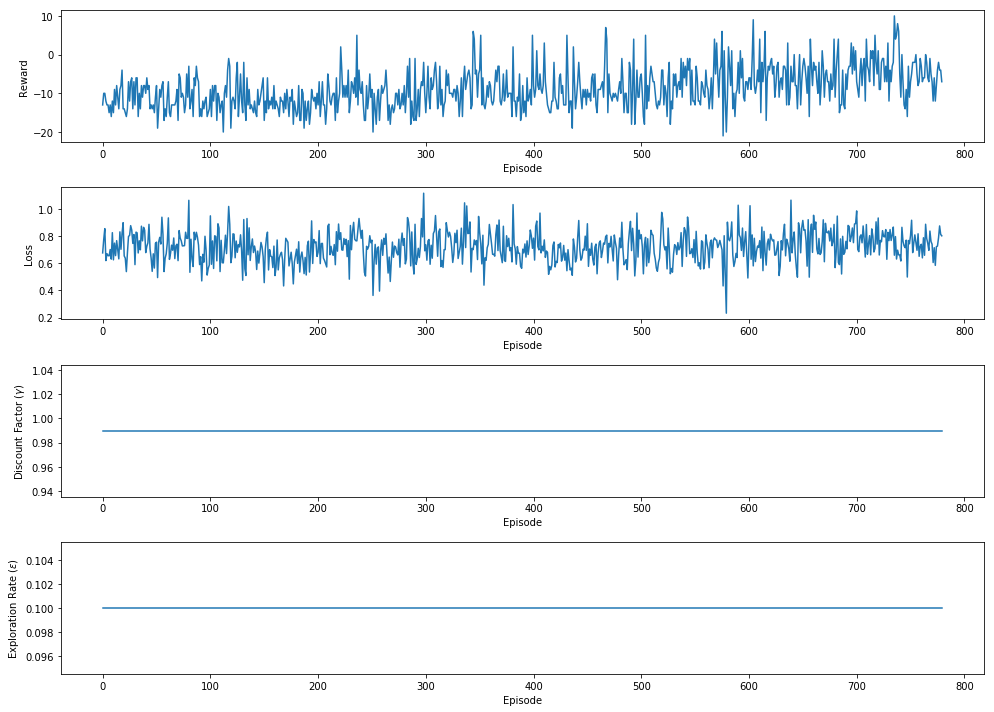

 80%|████████  | 4001027/5000000 [11:43:56<3:04:05, 90.45frame/s]

KeyboardInterrupt: 

In [16]:
agent.train(frames_to_play=5000000, callback=JupyterCallback())

In [17]:
res_trained = agent.play(games=30)
res_trained


100%|██████████| 30/30 [08:13<00:00, 16.44s/game]


array([ 5.,  1., -1.,  9.,  1.,  2., -8.,  4., -1.,  5., -1., -9.,  8.,
        3., -5.,  7.,  6., -5.,  3., -1.,  1.,  0.,  0.,  0.,  0.,  2.,
       -8., -1.,  0.,  5.])

In [18]:
res_trained.mean()

0.7333333333333333

In [19]:
!mkdir -p models
!mkdir -p models/dqn

In [20]:
agent.save_model('./models/dqn/pong-nondeterministic.h5')